In [12]:
# Activity 3 Group by
import pandas as pd
crypto_df=pd.read_csv('crypto_data.csv')

In [13]:
crypto_df

,cryptocurrency,data_price,data_date,data_time,timestamp
0,bitcoin,NaN,5/9/17,1.494290e+12,1.557290e+12
1,bitcoin,1743.723523,5/10/17,1.494370e+12,NaN
2,bitcoin,1828.678209,5/11/17,1.494460e+12,NaN
3,bitcoin,1776.443919,5/12/17,1.494550e+12,NaN
4,bitcoin,1714.964198,5/13/17,1.494630e+12,NaN
...,...,...,...,...,...
3551,litecoin,76.435295,5/3/19,1.556840e+12,NaN
3552,litecoin,77.011308,5/4/19,1.556930e+12,NaN
3553,litecoin,75.974875,5/5/19,1.557010e+12,NaN
3554,litecoin,73.722948,5/6/19,1.557100e+12,NaN


In [14]:
crypto_df.drop(0, inplace=True)
crypto_df.head()

,cryptocurrency,data_price,data_date,data_time,timestamp
1,bitcoin,1743.723523,5/10/17,1.494370e+12,NaN
2,bitcoin,1828.678209,5/11/17,1.494460e+12,NaN
3,bitcoin,1776.443919,5/12/17,1.494550e+12,NaN
4,bitcoin,1714.964198,5/13/17,1.494630e+12,NaN
5,bitcoin,1789.278913,5/14/17,1.494720e+12,NaN


In [11]:
crypto_df.drop(columns=['timestamp','data_time'], inplace=True)

In [12]:
crypto_df

,cryptocurrency,data_price,data_date
0,bitcoin,NaN,5/9/17
1,bitcoin,1743.723523,5/10/17
2,bitcoin,1828.678209,5/11/17
3,bitcoin,1776.443919,5/12/17
4,bitcoin,1714.964198,5/13/17
...,...,...,...
3551,litecoin,76.435295,5/3/19
3552,litecoin,77.011308,5/4/19
3553,litecoin,75.974875,5/5/19
3554,litecoin,73.722948,5/6/19


In [14]:
crypto_df['data_date'] = pd.to_datetime(crypto_df['data_date'])

In [15]:
crypto_df

,cryptocurrency,data_price,data_date
0,bitcoin,NaN,2017-05-09
1,bitcoin,1743.723523,2017-05-10
2,bitcoin,1828.678209,2017-05-11
3,bitcoin,1776.443919,2017-05-12
4,bitcoin,1714.964198,2017-05-13
...,...,...,...
3551,litecoin,76.435295,2019-05-03
3552,litecoin,77.011308,2019-05-04
3553,litecoin,75.974875,2019-05-05
3554,litecoin,73.722948,2019-05-06


In [16]:
crypto_df.dtypes

cryptocurrency            object
data_price               float64
data_date         datetime64[ns]
dtype: object

In [17]:
crypto_df.set_index(['data_date'], inplace=True)

In [18]:
crypto_df

,cryptocurrency,data_price
data_date,,
2017-05-09,bitcoin,NaN
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
...,...,...
2019-05-03,litecoin,76.435295
2019-05-04,litecoin,77.011308
2019-05-05,litecoin,75.974875


In [23]:
crypto_df.groupby(['cryptocurrency']).mean()

,data_price
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


In [26]:
crypto_df.groupby(['cryptocurrency']).mean().sort_values(by= 'data_price', ascending=False)

,data_price
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


In [28]:
import numpy as np
crypto_df['rounded_price'] = np.round(crypto_df['data_price'], 0)

In [29]:
crypto_df

,cryptocurrency,data_price,rounded_price
data_date,,,
2017-05-09,bitcoin,NaN,NaN
2017-05-10,bitcoin,1743.723523,1744.0
2017-05-11,bitcoin,1828.678209,1829.0
2017-05-12,bitcoin,1776.443919,1776.0
2017-05-13,bitcoin,1714.964198,1715.0
...,...,...,...
2019-05-03,litecoin,76.435295,76.0
2019-05-04,litecoin,77.011308,77.0
2019-05-05,litecoin,75.974875,76.0


In [35]:
temp_df = crypto_df.groupby(['cryptocurrency','rounded_price'])[['data_price']].count()

In [37]:
temp_df.index

MultiIndex([( 'bitcoin', 1715.0),
            ( 'bitcoin', 1743.0),
            ( 'bitcoin', 1744.0),
            ( 'bitcoin', 1776.0),
            ( 'bitcoin', 1789.0),
            ( 'bitcoin', 1802.0),
            ( 'bitcoin', 1829.0),
            ( 'bitcoin', 1841.0),
            ( 'bitcoin', 1932.0),
            ( 'bitcoin', 1958.0),
            ...
            ('litecoin',  300.0),
            ('litecoin',  308.0),
            ('litecoin',  315.0),
            ('litecoin',  319.0),
            ('litecoin',  321.0),
            ('litecoin',  353.0),
            (  'ripple',    0.0),
            (  'ripple',    1.0),
            (  'ripple',    2.0),
            (  'ripple',    3.0)],
           names=['cryptocurrency', 'rounded_price'], length=1767)

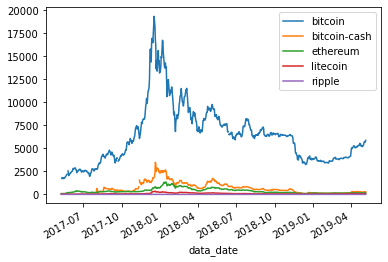

In [40]:
temp_df = crypto_df.groupby('cryptocurrency')['data_price'].plot(legend=True)

In [41]:
crypto_df

,cryptocurrency,data_price,rounded_price
data_date,,,
2017-05-09,bitcoin,NaN,NaN
2017-05-10,bitcoin,1743.723523,1744.0
2017-05-11,bitcoin,1828.678209,1829.0
2017-05-12,bitcoin,1776.443919,1776.0
2017-05-13,bitcoin,1714.964198,1715.0
...,...,...,...
2019-05-03,litecoin,76.435295,76.0
2019-05-04,litecoin,77.011308,77.0
2019-05-05,litecoin,75.974875,76.0


In [42]:
# renaming
cdf = crypto_df.copy(deep=True)

In [43]:
cdf

,cryptocurrency,data_price,rounded_price
data_date,,,
2017-05-09,bitcoin,NaN,NaN
2017-05-10,bitcoin,1743.723523,1744.0
2017-05-11,bitcoin,1828.678209,1829.0
2017-05-12,bitcoin,1776.443919,1776.0
2017-05-13,bitcoin,1714.964198,1715.0
...,...,...,...
2019-05-03,litecoin,76.435295,76.0
2019-05-04,litecoin,77.011308,77.0
2019-05-05,litecoin,75.974875,76.0


In [47]:
# Grabbing it by the year
new_cdf = cdf.groupby([cdf.index.year, cdf.index.month]).first()

In [52]:
new_cdf.loc[2018,1]

cryptocurrency        bitcoin
data_price        13430.40268
rounded_price         13430.0
Name: (2018, 1), dtype: object

In [53]:
new_cdf.loc[2018,1]['data_price']

13430.40268

In [54]:
# group by first example
#   Name  Age
#0  Alex   10
#1  Jake    5
#2  Alex   20
#3  Jake   10
#grouped_df = df.groupby("Name")
#Group DataFrame by `"Name"` column

#first_values = grouped_df.first()
#first_values = first_values.reset_index()
#Reset indices to match format

#print(first_values)
#OUTPUT
#   Name  Age
#0  Alex   10
#1  Jake    5

In [ ]:
cdf['data_price'].mean()
cdf['data_price'].max()
cdf['data_price'].min()